In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [141]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [142]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [143]:
# Get statistical info from dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [144]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [145]:
# Drop CustomerID as it's only an identifier.
df = df.drop(columns=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [146]:
# rename the Annual Income(k$)	and Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Feature Encoding

In [147]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
# Columns: Gender

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

df_encoded.sample(n = 5)

,Gender,Age,Annual Income,Spending Score
178,1,59,93,14
199,1,30,137,83
190,0,34,103,23
148,0,34,78,22
164,1,50,85,26


#Visualization

In [148]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

From the 3D scatter plot of Age, Annual Income, and Spending Score:

*   There appears to be some clustering of data points, particularly when considering the combination of all three features.
*   Customers with high annual income tend to have a wide range of spending scores, but there seems to be a group with high income and low spending score, and another with high income and high spending score.
*   Customers with low annual income also exhibit varying spending scores, with a notable group having low income and high spending scores.
*   Age seems to play a role in the distribution of customers within these income and spending score groups, although the relationship is not as clearly defined as the relationship between annual income and spending score.
*   This 3D visualization reinforces the potential for using clustering algorithms to identify distinct customer segments.

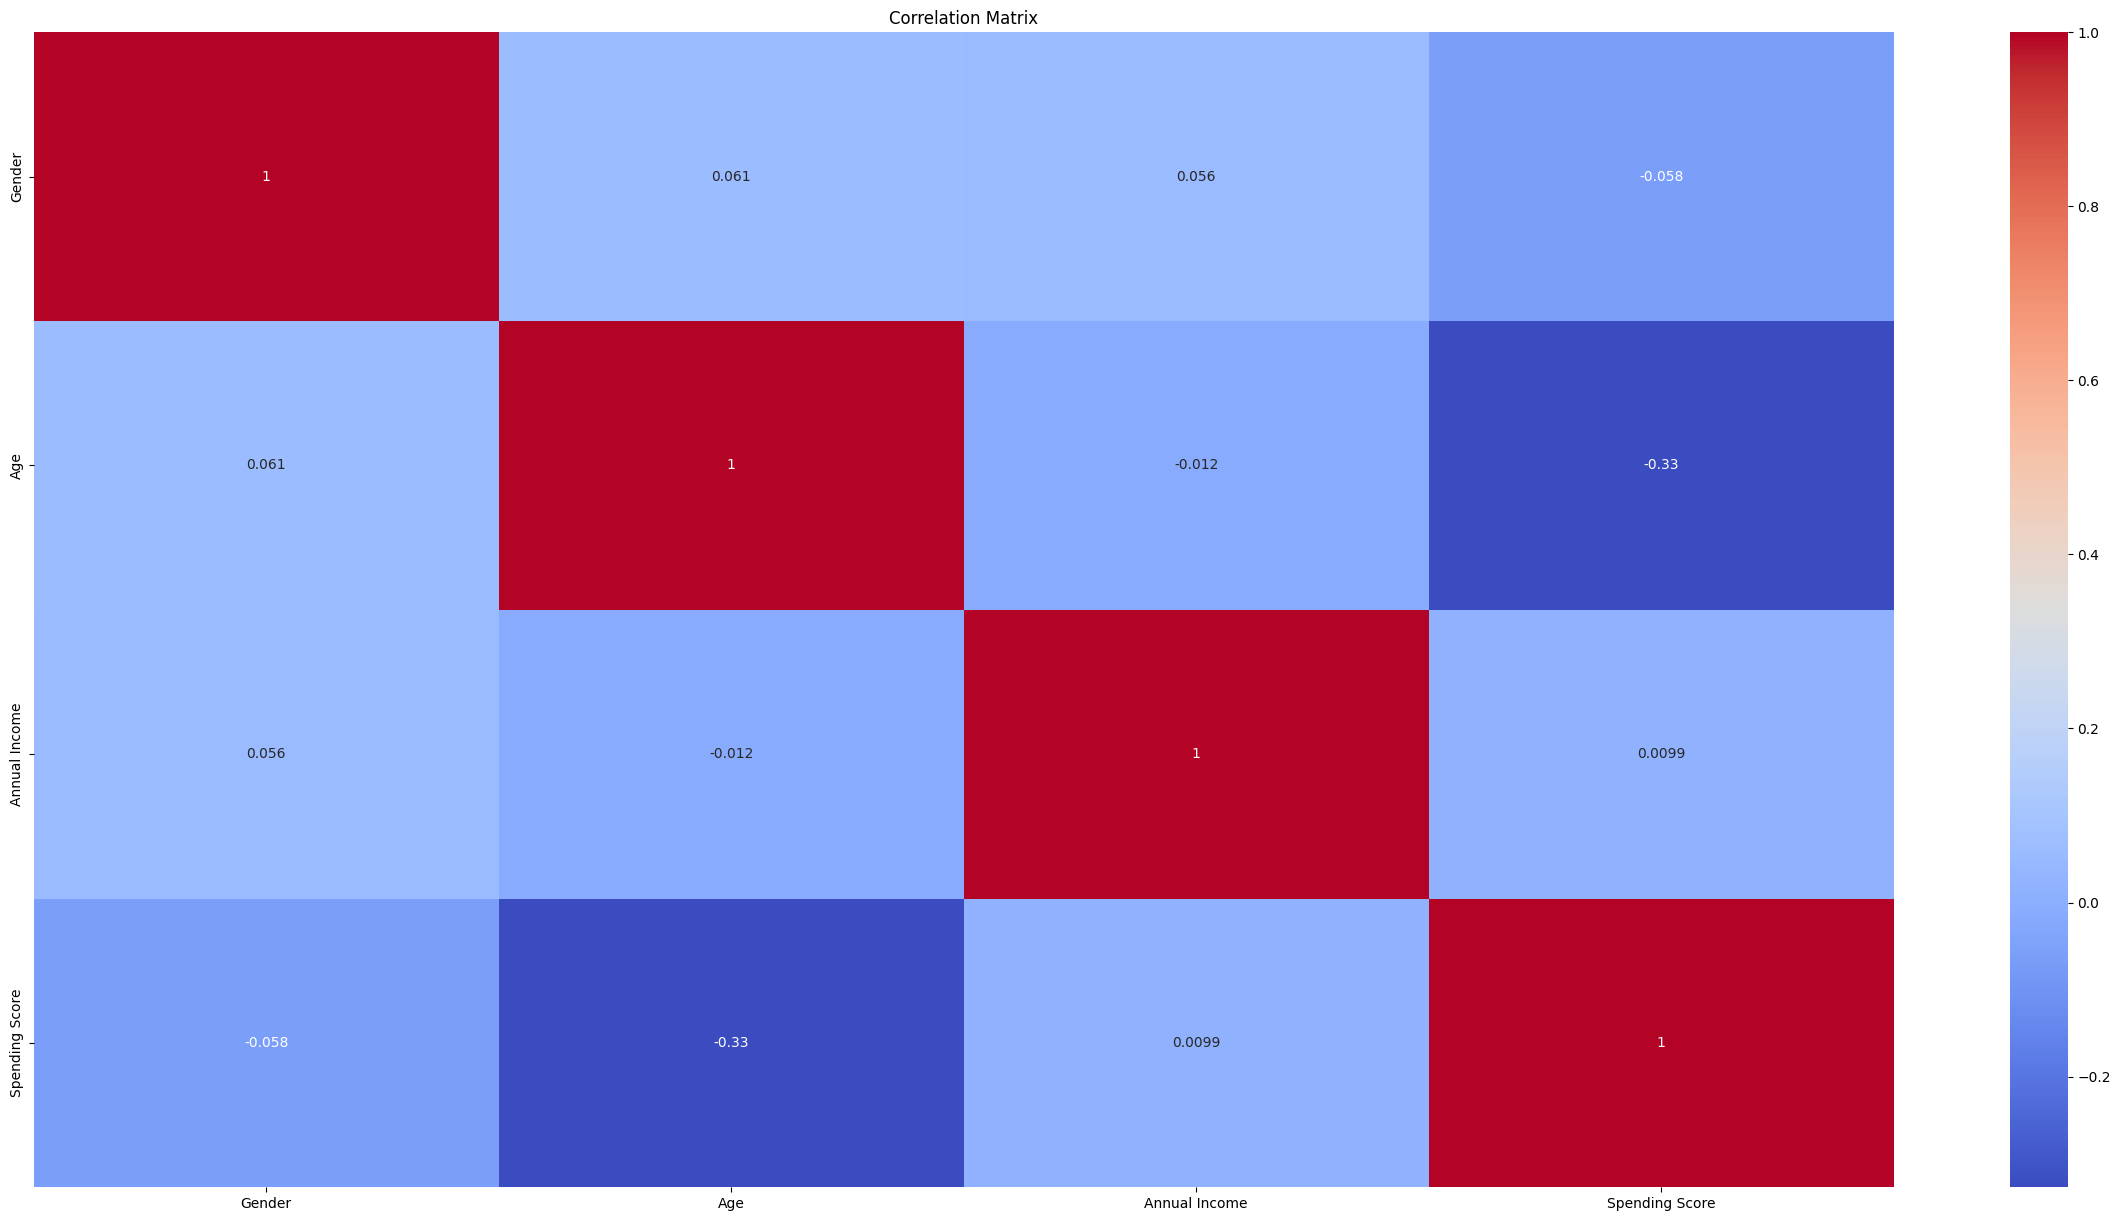

In [149]:
# Heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows the correlation between the different features in the dataset.

*   Spending Score and Annual Income: There is a moderate negative correlation between Spending Score and Annual Income. This suggests that as annual income increases, spending score tends to decrease, and vice versa.
*   Age and Spending Score: There is a weak negative correlation between Age and Spending Score. This indicates a slight tendency for younger customers to have higher spending scores.
*   Age and Annual Income: There appears to be a weak positive correlation between Age and Annual Income. This suggests a slight tendency for older customers to have higher annual income.
*   Gender and Spending Score: There is a weak correlation between Gender and Spending Score. This suggests that gender does not have a strong linear relationship with spending score.

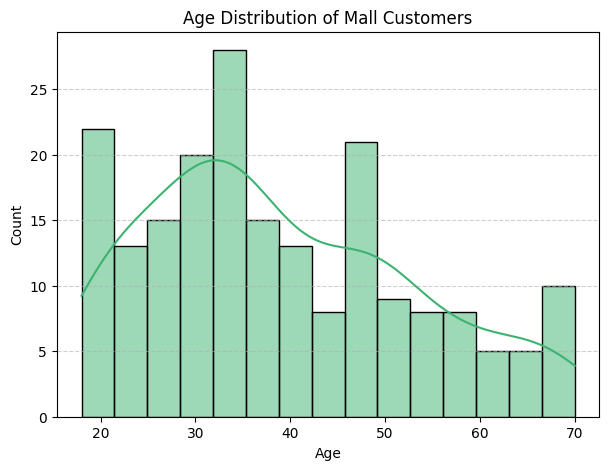

In [150]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=15, kde=True, color='mediumseagreen')
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


From the histogram of the Age distribution:

*   The distribution is somewhat right-skewed, indicating a larger number of younger customers in the dataset.
*   The most frequent age group appears to be in their late 20s and early 30s.
*   There is a gradual decrease in the number of customers as age increases, with fewer customers in the older age brackets.

In [151]:
# create new dataframe that consist only annual income and spending score
df = df[['Age', 'Annual Income', 'Spending Score']]
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Data Scaling


In [152]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Annual Income", "Spending Score"])

df_sc_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Scaling is important for distance-based algorithms like K-Means clustering because these algorithms calculate distances between data points to group them into clusters. If the features have different scales, features with larger values can dominate the distance calculation and disproportionately influence the clustering result. Standardizing the features to have a mean of 0 and a standard deviation of 1 ensures that all features contribute equally to the distance calculations, leading to a more accurate and meaningful clustering.

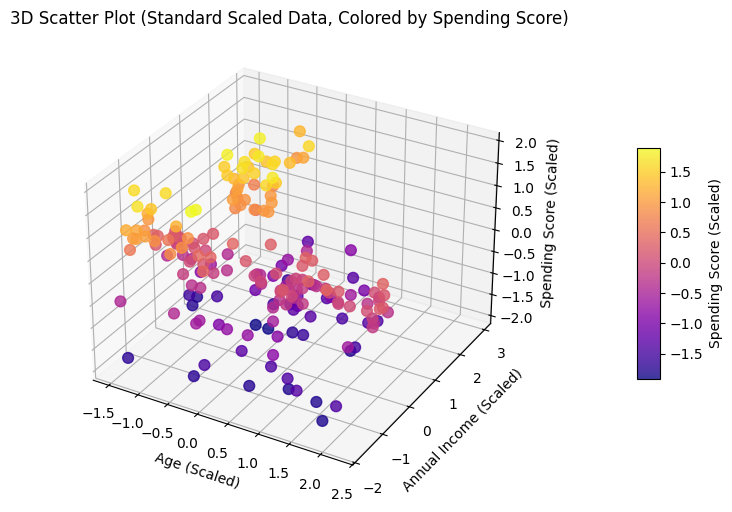

In [153]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(
    df_sc_scaled["Age"],
    df_sc_scaled["Annual Income"],
    df_sc_scaled["Spending Score"],
    c=df_sc_scaled["Spending Score"], cmap="plasma", s=60, alpha=0.8
)

ax.set_xlabel("Age (Scaled)")
ax.set_ylabel("Annual Income (Scaled)")
ax.set_zlabel("Spending Score (Scaled)")
ax.set_title("3D Scatter Plot (Standard Scaled Data, Colored by Spending Score)")

cbar = fig.colorbar(p, ax=ax, shrink=0.5, aspect=10, pad=0.15)
cbar.set_label("Spending Score (Scaled)")

plt.show()

# K-Means Clustering

In [154]:
from sklearn.cluster import KMeans

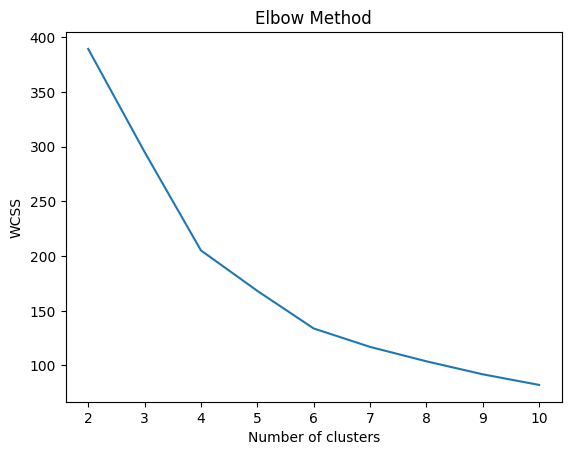

In [155]:
wcss = []
for i in range(2, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  389.386189
1                   3  295.212246
2                   4  205.225147
3                   5  168.247580
4                   6  133.868334
5                   7  117.011555
6                   8  103.828578
7                   9   91.956839
8                  10   82.245745


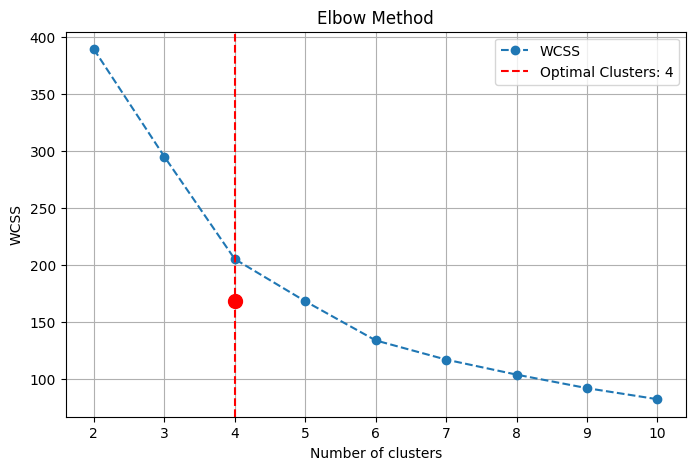

The optimal number of clusters is: 4


In [157]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [158]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Age,Annual Income,Spending Score,KMeans_Cluster
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3


In [159]:
import plotly.express as px

fig = px.scatter_3d(
    df_sc_scaled,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

/tmp/ipython-input-2637191649.py:4: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



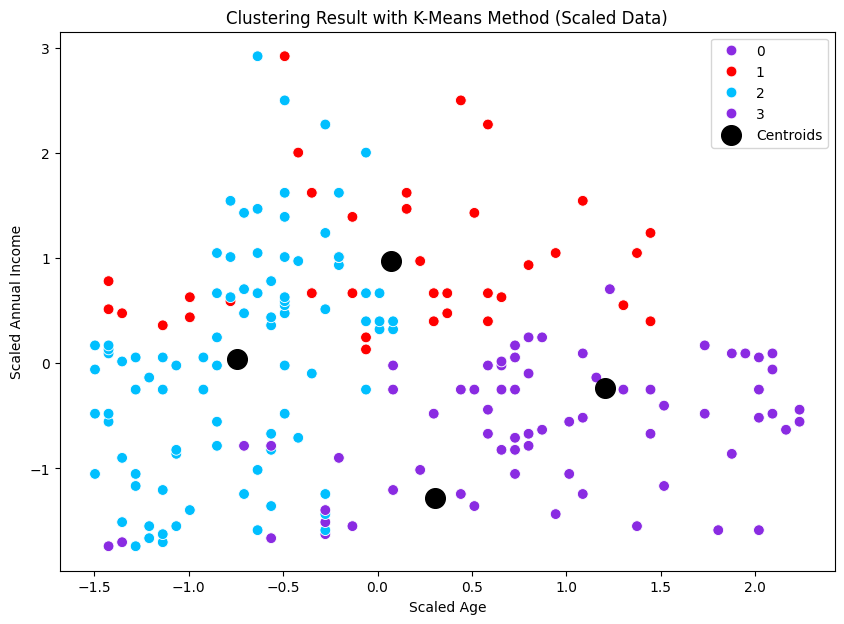

In [160]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

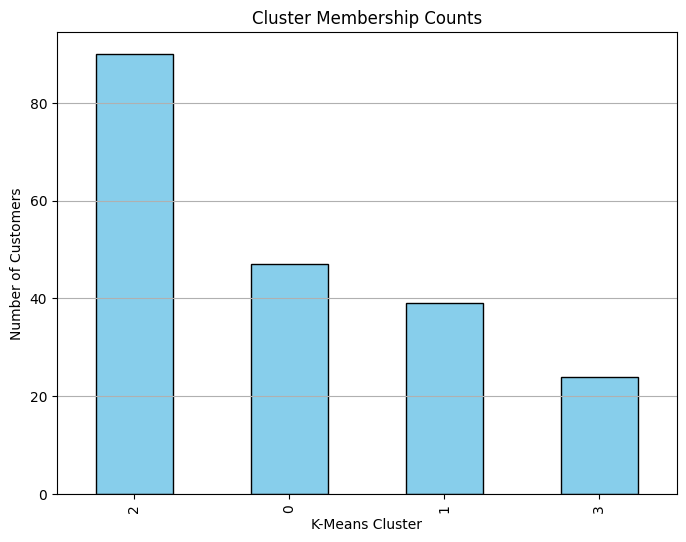

In [161]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [162]:
def mode_func(x):
    return x.mode()[0]

# Add the cluster labels to the df_encoded DataFrame
df_encoded['KMeans_Cluster'] = clusters

# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_encoded.groupby('KMeans_Cluster').agg({'Age': ['mean', 'min', 'max'],
                                            'Annual Income': ['mean', 'min', 'max'],
                                            'Spending Score': ['mean', 'min', 'max'],
                                            'Gender': mode_func })


cluster_summary

Age         Annual Income          Spending Score      \
                     mean min max          mean min  max           mean min   
KMeans_Cluster                                                                
0               55.638298  40  70     54.382979  38   79      48.851064  35   
1               39.871795  19  59     86.102564  64  137      19.358974   1   
2               28.500000  18  40     61.677778  15  137      71.766667  41   
3               43.125000  19  67     26.958333  15   40      22.083333   3   

                      Gender  
               max mode_func  
KMeans_Cluster                
0               60         0  
1               42         1  
2               99         0  
3               42         0

# Managerial Implications Based on the Four Clusters

Based on the cluster summary, here are some possible personas and managerial implications for each cluster:

**Cluster 0: Older/Mid-Income**

*   **Profile:**
    *   Age: Around 55.6 years old (range 40-70).
    *   Annual Income: Moderate, averaging around $54.4k (range $38k-$79k).
    *   Spending Score: Moderate, averaging around 48.9 (range 35-60).
    *   Dominant Gender: Female (mode = 0).
*   **Implications:**
    *   Target with value-for-money products and services.
    *   Focus on practical benefits and reliability in marketing.
    *   Consider loyalty programs for repeat business.
    *   Tailor marketing messages and channels to resonate with a primarily female audience in this age and income bracket.

**Cluster 1: Mid-Age/High-Income, Low-Spending**

*   **Profile:**
    *   Age: Around 39.9 years old (range 19-59).
    *   Annual Income: High, averaging around $86.1k (range $64k-$137k).
    *   Spending Score: Low, averaging around 19.4 (range 1-42).
    *   Dominant Gender: Male (mode = 1).
*   **Implications:**
    *   Focus on converting income into spending.
    *   Offer exclusive products or services that appeal to their high income but address their low spending habits (e.g., investment opportunities, luxury items with perceived high value).
    *   Highlight the benefits of spending on experiences or quality.
    *   Consider marketing strategies that appeal to men with high disposable income but who are currently low spenders in this category.

**Cluster 2: Young/Mid-High Income, High-Spending**

*   **Profile:**
    *   Age: Around 28.5 years old (range 18-40).
    *   Annual Income: Mid-High, averaging around $61.7k (range $15k-$137k).
    *   Spending Score: High, averaging around 71.8 (range 41-99).
    *   Dominant Gender: Female (mode = 0).
*   **Implications:**
    *   These are valuable customers with high spending potential.
    *   Target with trendy, innovative products and experiences.
    *   Utilize social media and digital marketing channels.
    *   Offer subscription services or early access to new products.
    *   Focus on marketing campaigns and product offerings that resonate with young, high-spending women.

**Cluster 3: Mid-Age/Low-Income, Low-Spending**

*   **Profile:**
    *   Age: Around 43.1 years old (range 19-67).
    *   Annual Income: Low, averaging around $27k (range $15k-$40k).
    *   Spending Score: Low, averaging around 22.1 (range 3-42).
    *   Dominant Gender: Female (mode = 0).
*   **Implications:**
    *   Focus on essential goods and services at affordable prices.
    *   Offer discounts, coupons, and bundle deals.
    *   Emphasize practicality and cost savings in marketing.
    *   Consider cost-effective marketing approaches to reach this segment, which is primarily female and has limited spending power.